In [21]:
import os
import numpy as np
from landlab import RasterModelGrid
import landlab
from landlab.io import read_esri_ascii
from landlab.components import FlowAccumulator, FastscapeEroder, SedDepEroder,LinearDiffuser, ErosionDeposition, DepressionFinderAndRouter
from landlab.io.esri_ascii import write_esri_ascii
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#TEST = 'erosion_deposition_uplift_0,001_18_8'
TEST = 'ed_test_uplift_0,002'


In [32]:
def get_dem_folder(folder_name):
    loops = [1000, 2000, 4000, 6000, 8000, 10000]
    dems = []
    folder_parent = "DEM"
    
    for loop in loops:
        file_name = str(loop) + "_topographic__elevation.asc"
        (dem, _) = read_esri_ascii("./{folder_parent}/{folder_name}/{file_name}".format(folder_parent=folder_parent, folder_name=folder_name, file_name=file_name), name="topographic__elevation")
        dems.append(dem)
     
    return dems

In [33]:
dems = get_dem_folder(TEST)

In [34]:
means = list(map(lambda x: np.mean(x.at_node['topographic__elevation']), dems))

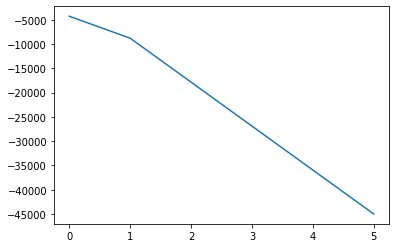

In [35]:
plt.plot(means)

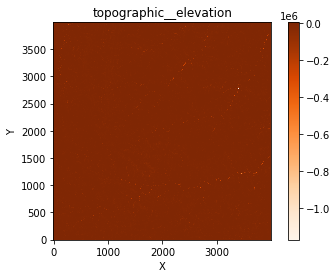

In [36]:
landlab.plot.imshow.imshow_grid_at_node(dems[0],'topographic__elevation', cmap="Oranges") 

In [37]:
grid = dems[0].at_node['topographic__elevation']

In [38]:
grid[grid< 0]

array([-1603.8656714 , -1614.33457153,  -815.0638055 , ..., -8746.023315  ,
       -9166.52929543, -1824.91836258])